<a href="https://colab.research.google.com/github/likhitha-bellamkonda/ivy-league-admission-prediction/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jamboree Admission Predictor at IVY League College

**Problem Statement**

Description :    
This project estimates the probability of student admission to Ivy League College based on factors such as GRE, TOEFL, SOP, LOR, and CGPA.It helps applicants understand their admission chances and make informed decisions during the application process.

**Exploratary Data Analysis(EDA)**

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("/content/Jamboree_Admission.csv")

pd.read_csv() is used to read data from a CSV file format into a DataFrame.

In [84]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


df.head() displays the first 5 rows of a dataset by default.

In [85]:
df.shape

(500, 9)

Number of Rows = 500

Number of Features = 9

In [86]:
df.drop("Serial No.",axis=1,inplace=True)

df.drop() is used to remove the Serial No. column because it is not useful for prediction.
If we keep it, the classifier may try to learn from it even though it has no real meaning.

In [87]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [88]:
df.shape

(500, 8)

After removing the Serial No. feature, the shape of the dataset changed.
The dataset now contains 500 rows and 8 features.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


All columns/features sre non - null count(no null values )

Total - 4 integer dtypes

Total - 4 float dtypes

In [90]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Out of a maximum of 340 GRE marks, 50% of the students scored 317, and these students have an admission chance of approximately 72%

Out of a maximum of 120 TOEFL marks, 75% of the students scored 112, and these students have an admission chance of around 82%

Out of a maximum of 5 CGPA grade, 25% of the students scored 8.12, and these students have an admission chance of around 63%








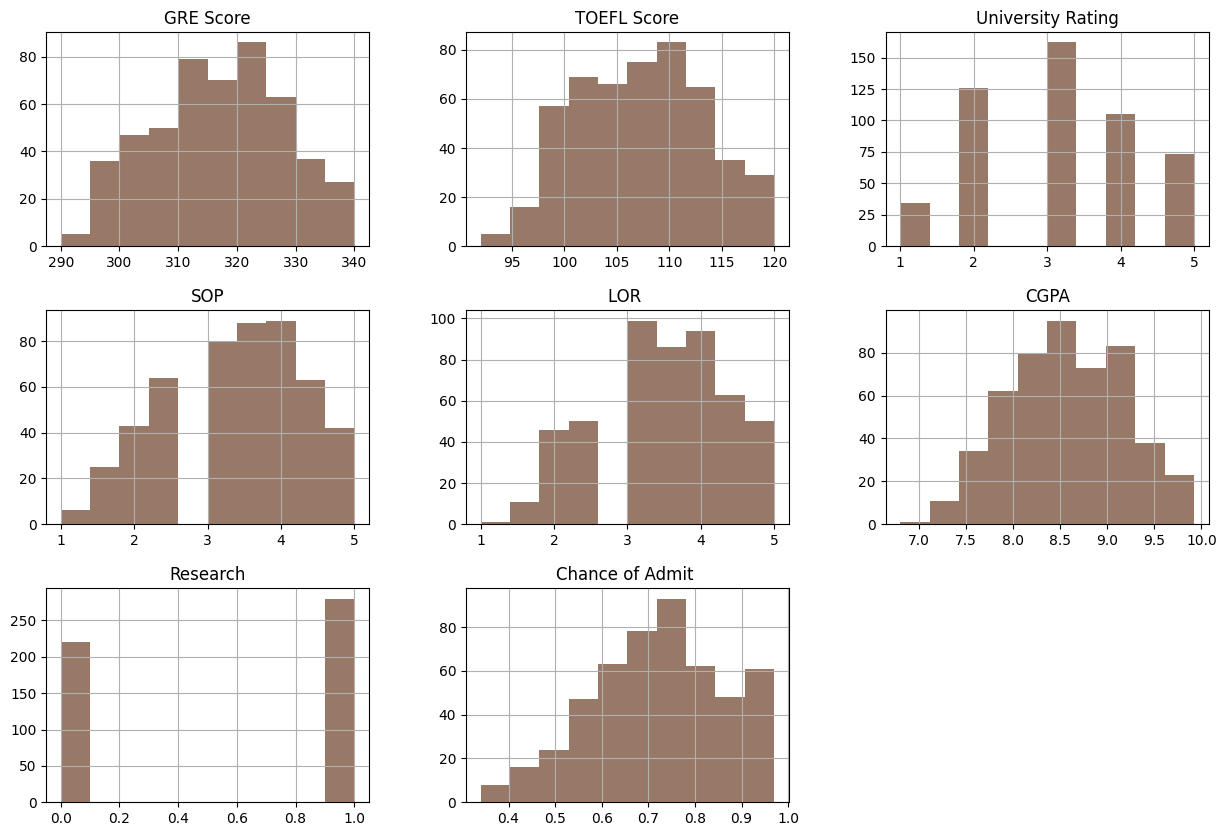

In [91]:
df.hist(figsize=[15,10],color="#987867")
plt.show()

Histograms help in understanding the distribution, range, and frequency of values for each feature.

Most students have GRE scores between 310 and 320, indicating this is the most common score range in the dataset.

Most students are from universities with a rating of 3, indicating average academic performance.

In [92]:
df["CGPA"]

,CGPA
0,9.65
1,8.87
2,8.00
3,8.67
4,8.21
...,...
495,9.02
496,9.87
497,9.56
498,8.43


It returns a Series containing all CGPA values for the students in the dataset

In [93]:
df["CGPA"].value_counts()

,count
CGPA,
8.00,9
8.76,9
8.56,7
8.12,7
8.45,7
...,...
7.57,1
7.21,1
9.27,1


It gives the count of each unique category.

In [94]:
df["CGPA"].value_counts(normalize=True)*100

,proportion
CGPA,
8.00,1.8
8.76,1.8
8.56,1.4
8.12,1.4
8.45,1.4
...,...
7.57,0.2
7.21,0.2
9.27,0.2


About 1.8% of students have a CGPA of 8.00, while only 0.2% of students have a CGPA below 7.69

In [95]:
df["GRE Score"]

,GRE Score
0,337
1,324
2,316
3,322
4,314
...,...
495,332
496,337
497,330
498,312


In [96]:
df["GRE Score"].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293])

Returns the array of unique categories

In [97]:
df["GRE Score"].nunique()

49

Total 49 unique categories

**Uni Variate Analysis**

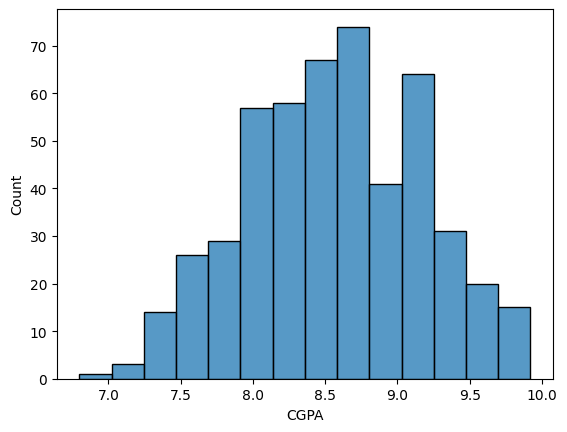

In [98]:
sns.histplot(df["CGPA"])
plt.show()

The CGPA distribution shows that most students have scores between 8.0 and 8.5.
Only 0.2% of students have a CGPA around 7.0, while approximately 10.15% have a high CGPA close to 9.7.

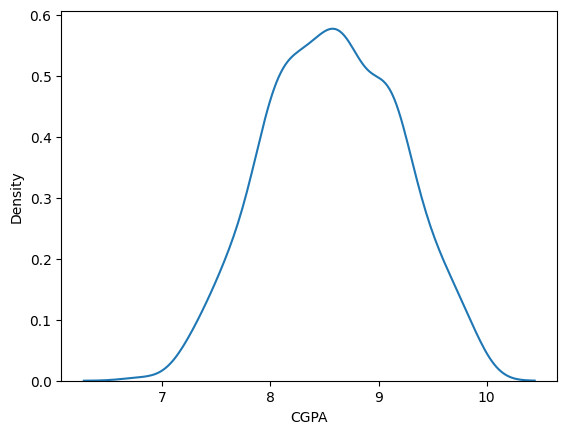

In [99]:
sns.kdeplot(df["CGPA"])
plt.show()

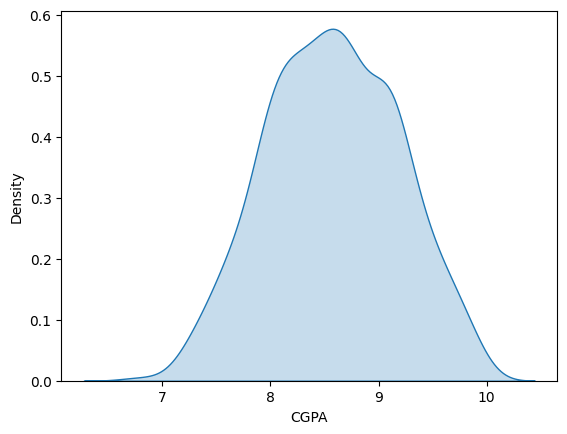

In [100]:
sns.kdeplot(df["CGPA"],fill=True)
plt.show()

Majority of the students fall in the region of 8-9 CGPA

**Bi-Variate Analysis**

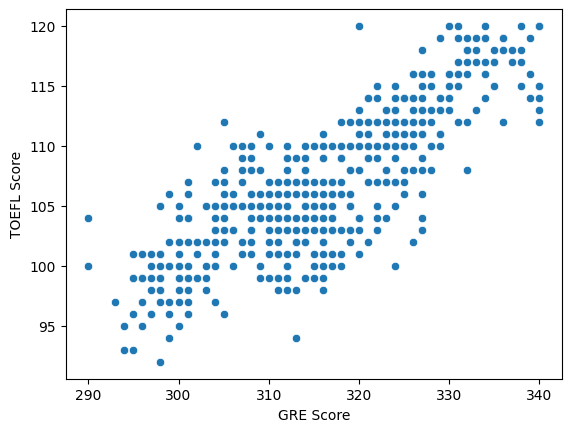

In [101]:
sns.scatterplot(data=df,x="GRE Score",y="TOEFL Score")
plt.show()

As GRE Score increases, the TOEFL Score also increasing... maintaing a strictly positive correlation

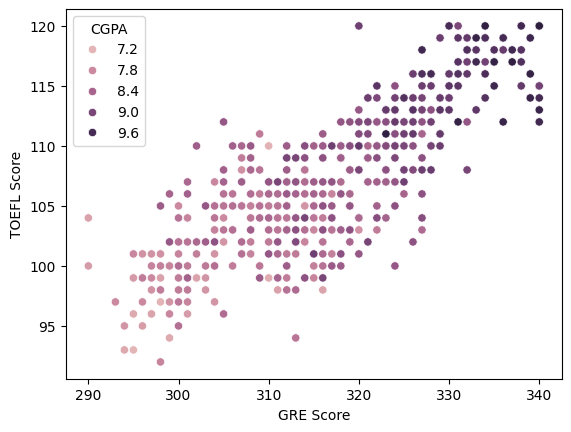

In [102]:
sns.scatterplot(data=df,x="GRE Score",y="TOEFL Score",hue="CGPA")
plt.show()

here hue=CGPA is making an impact on both GRE and TOEFL Score

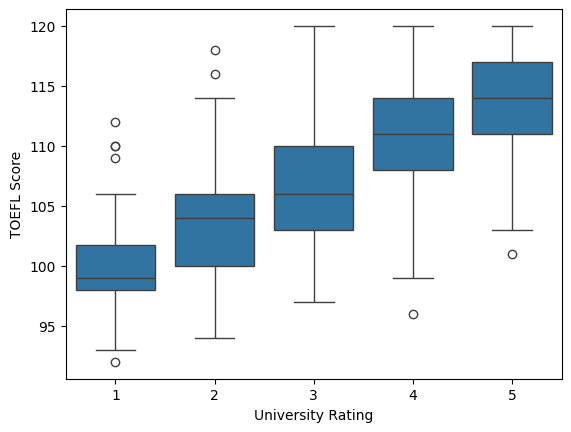

In [103]:
sns.boxplot(data=df,x="University Rating",y="TOEFL Score")
plt.show()

Universities rated 4 and 5 have higher median TOEFL Scores than those rated 1. Most Students receive a rating of 3 based on their TOEFL Scores.

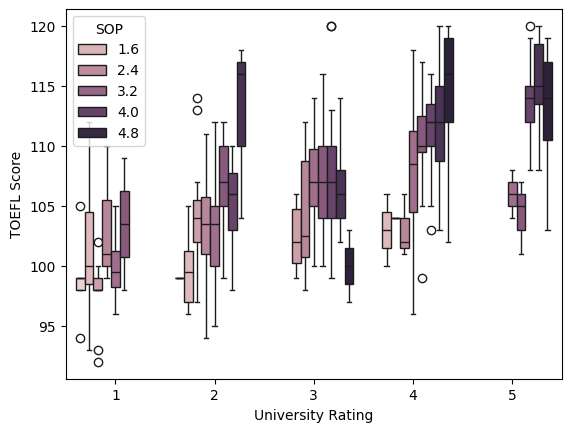

In [104]:
sns.boxplot(data=df,x="University Rating",y="TOEFL Score",hue="SOP")
plt.show()

here hue=SOP is making an impact on both University Rating and TOEFL Score

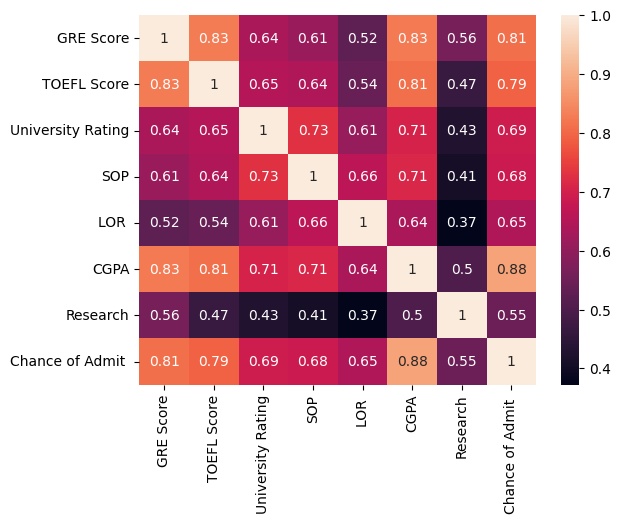

In [105]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Observed strong correlation of 88% between CGPA  vs Chance of Admit.

Weak Correlation of 37% between LOR vs Research.


**Multi - variate Analysis**

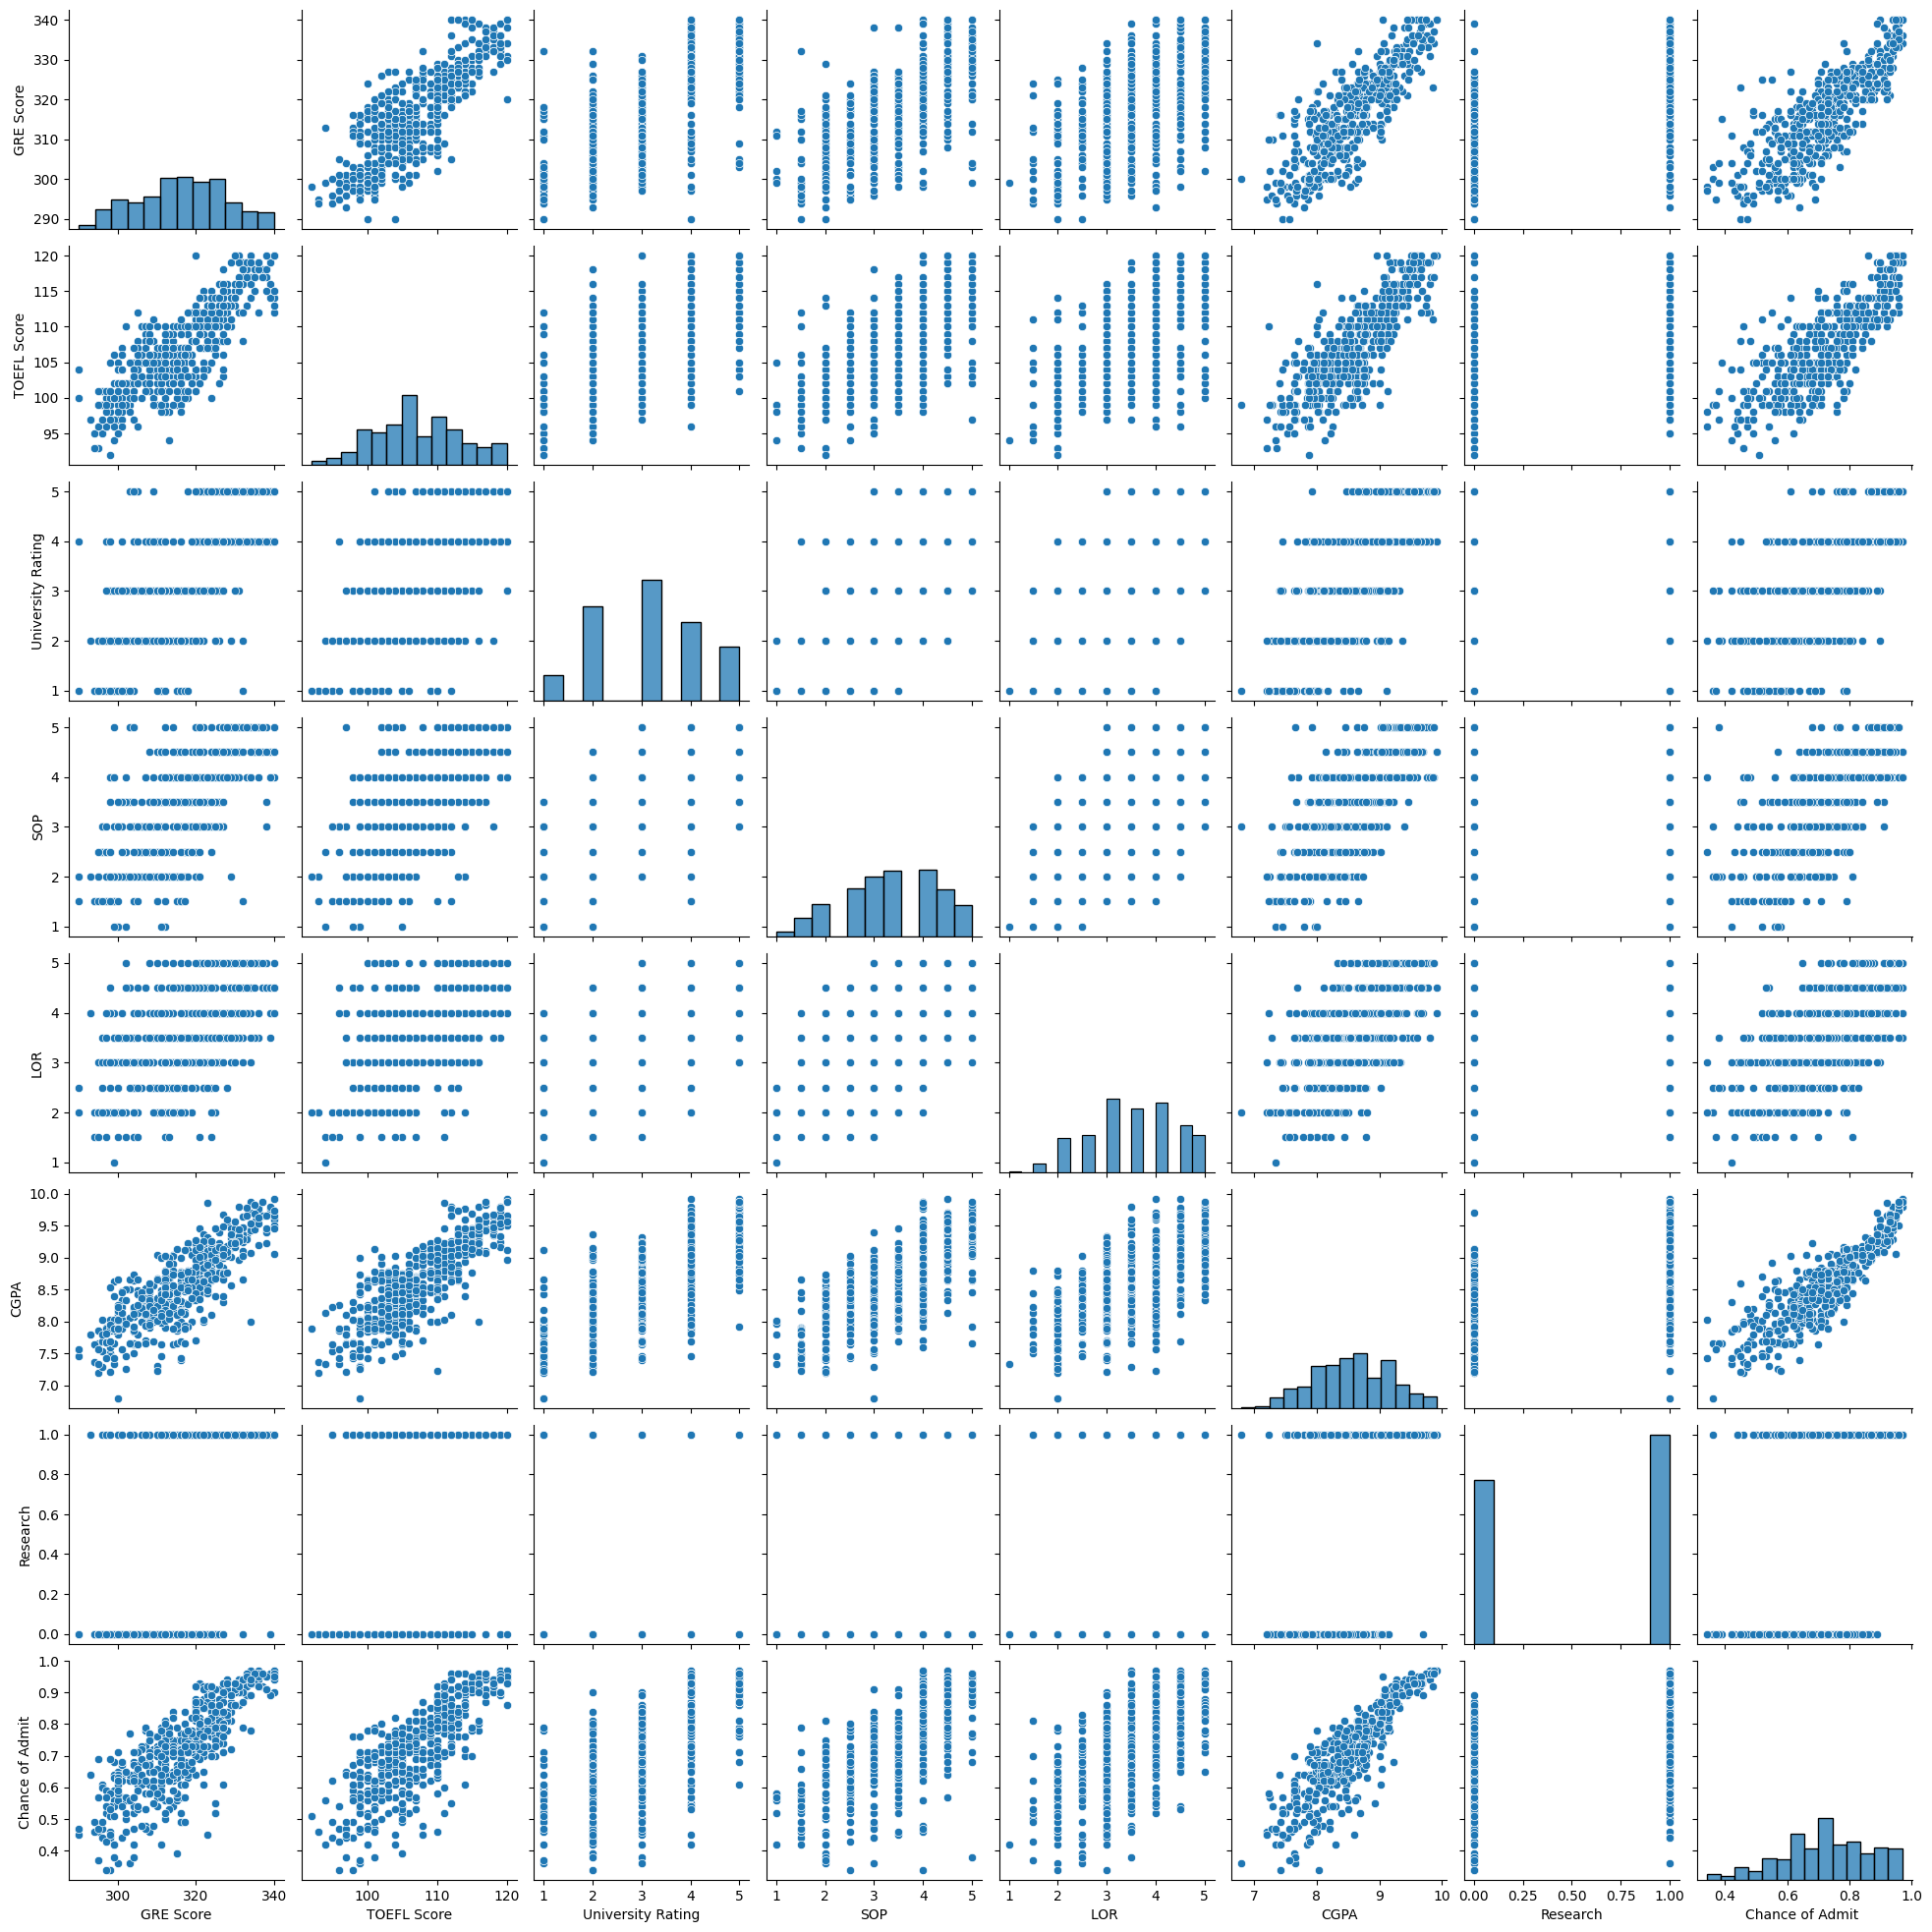

In [106]:
sns.pairplot(df)
plt.show()

Displays pairwise correlations and distributions of numerical features.

The GRE Score and Chance of Admit are positively correlated.

**DATA PRE-PROCESSING**

In [107]:
df.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


There are no null values in Data Frame

In [108]:
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [109]:
print(df.duplicated().sum())

0


There are no duplicates values in Data Frame

In [110]:
print(df.dtypes)

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


It helps identify whether features are numerical or categorical and ensures they are suitable for analysis and modeling.

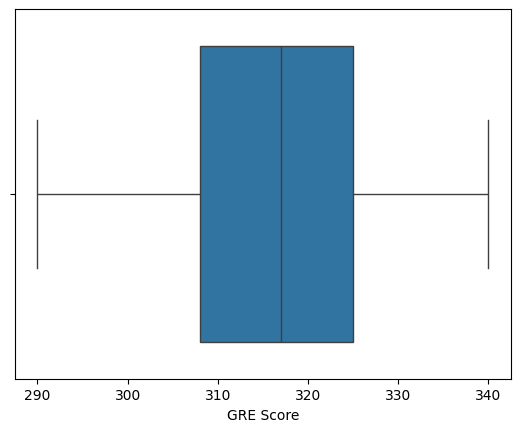

In [111]:
sns.boxplot(x=df["GRE Score"])
plt.show()

We are not have outliers in the GRE Score Feature

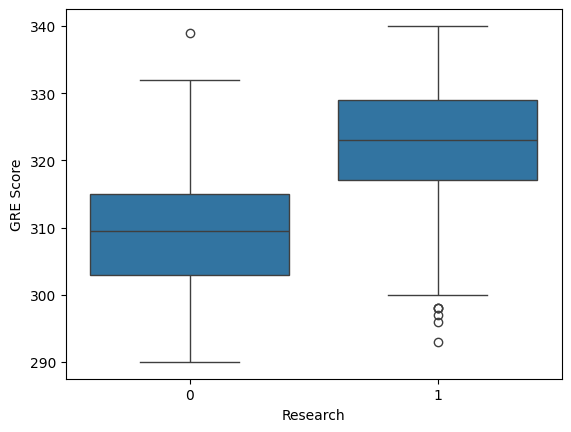

In [112]:
sns.boxplot(x="Research",y="GRE Score",data=df)
plt.show()

The box plot shows that students with research experience (Research = 1) have a higher median GRE score compared to students without research experience (Research = 0).

In [113]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

It displays the overall feature names present in the DataFrame.

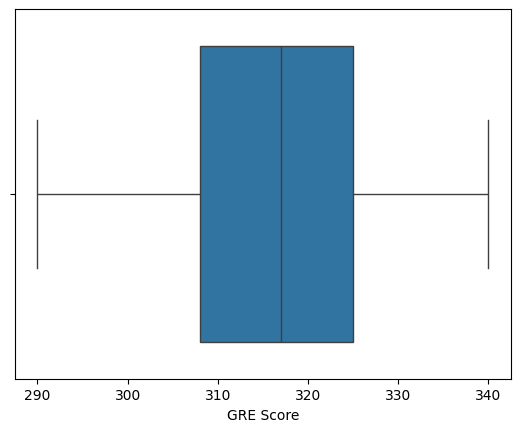

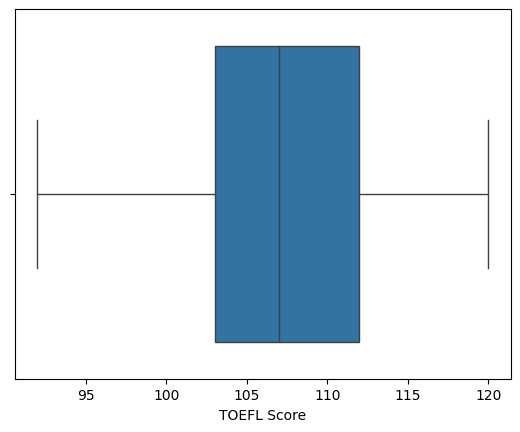

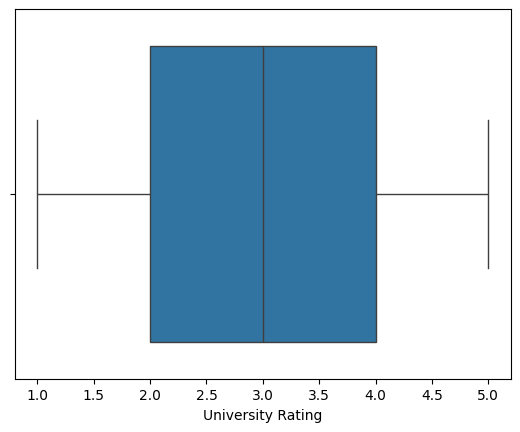

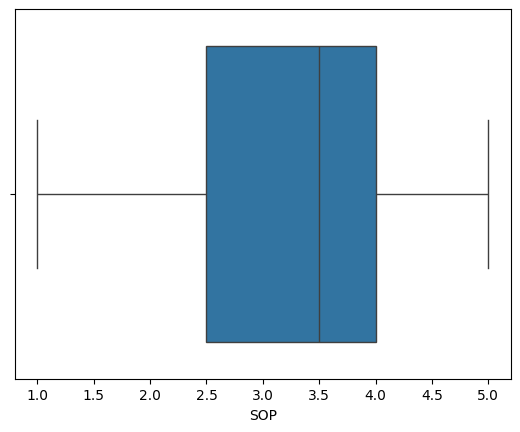

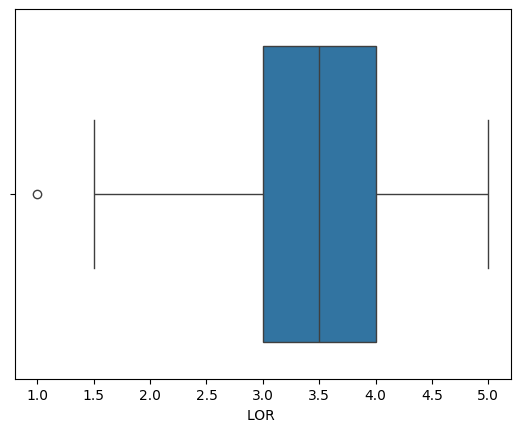

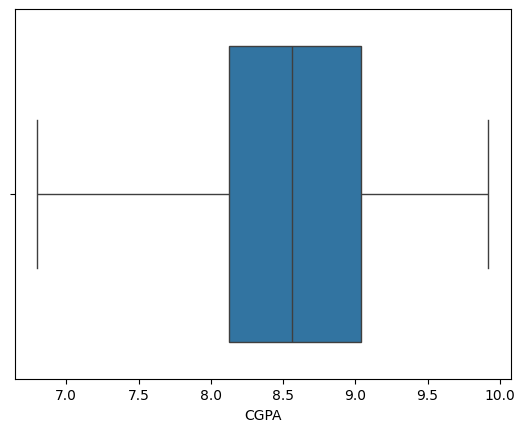

In [114]:
num_cols =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

for col in num_cols:
  sns.boxplot(x=df[col])
  plt.show()

The median GRE Score lies between 310 and 320, and most students fall within this range.

The median TOEFL Score lies between 105 and 110, and most students fall within this range.

The median CGPA score lies between 8.6, and most students fall within this range.

**Feature Engineering**

In [115]:
df["Overall_Score"] = df["GRE Score"] + df["TOEFL Score"]

A new feature Overall_Score was created by combining the GRE Score and TOEFL.

In [116]:
df["SOP_LOR_Interaction"] = df["SOP"] * df["LOR "]

A new feature SOP_LOR_Interaction was created by multiplying the SOP  and LOR

In [117]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Overall_Score,SOP_LOR_Interaction
0,337,118,4,4.5,4.5,9.65,1,0.92,455,20.25
1,324,107,4,4.0,4.5,8.87,1,0.76,431,18.00
2,316,104,3,3.0,3.5,8.00,1,0.72,420,10.50
3,322,110,3,3.5,2.5,8.67,1,0.80,432,8.75
4,314,103,2,2.0,3.0,8.21,0,0.65,417,6.00


In [118]:
df.shape

(500, 10)

After Adding new features the shape became

Number of Rows = 500

Number of Features = 10


In [119]:
X = df.drop("Chance of Admit " , axis=1)
y=df["Chance of Admit "]

The dataset was divided into independent features (X) and the target feature (y) based on the DataFrame.

From the DataFrame, the independent variables (X) were created by dropping the Chance of Admit column, and the target variable (y) was selected as Chance of Admit.

In [120]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Overall_Score,SOP_LOR_Interaction
0,337,118,4,4.5,4.5,9.65,1,455,20.25
1,324,107,4,4.0,4.5,8.87,1,431,18.00
2,316,104,3,3.0,3.5,8.00,1,420,10.50
3,322,110,3,3.5,2.5,8.67,1,432,8.75
4,314,103,2,2.0,3.0,8.21,0,417,6.00


These are the Independent variables

In [121]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


Target Feature

**Model Building**

In [122]:
from sklearn.model_selection import train_test_split

It is used to split the dataset into Training and Testing sets.

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

The 80% of the data used for Training set(X_train,y_train) and 20% of the data used for Testing set(X_test,y_test).

In [124]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(400, 9)
(400,)
(100, 9)
(100,)


After splitting the data, the shape of X_train is (400, 9), representing 400 training samples with 9 independent feature values.

The shape of y_train is (400, ), representing 400 target values with 1 Target Feature.

The shape of X_test is (100,9), representing 100 test samples with 9 independent feature values.

The shape of y_test is (100, ), representing 100 test samples with 1 Target Feature.

In [125]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Overall_Score,SOP_LOR_Interaction
249,321,111,3,3.5,4.0,8.83,1,432,14.00
433,316,111,4,4.0,5.0,8.54,0,427,20.00
19,303,102,3,3.5,3.0,8.50,0,405,10.50
322,314,107,2,2.5,4.0,8.27,0,421,10.00
332,308,106,3,3.5,2.5,8.21,1,414,8.75
...,...,...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1,440,20.25
270,306,105,2,2.5,3.0,8.22,1,411,7.50
348,302,99,1,2.0,2.0,7.25,0,401,4.00
435,309,105,2,2.5,4.0,7.68,0,414,10.00


Before Standardization, The Feature Values.

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

It is used to transformin the each feature to Scaled Feature(Specific Range)

In [127]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Transforming the X_train and X_test features to Scaled Features.

In [128]:
X_train

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.89543386,
         0.48663948,  0.28070002],
       [-0.06640493,  0.6024183 ,  0.7754586 , ..., -1.11677706,
         0.18009492,  1.29451499],
       [-1.25302222, -0.87691722, -0.09829757, ..., -1.11677706,
        -1.1687011 , -0.31069205],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.11677706,
        -1.41393674, -1.4089916 ],
       [-0.7053527 , -0.38380538, -0.97205374, ..., -1.11677706,
        -0.61692091, -0.39517663],
       [-0.24896144, -0.21943477, -0.97205374, ..., -1.11677706,
        -0.24906745,  0.28070002]])

These are the Scaled Features of X_train

In [129]:
X_test

array([[ 1.57660363,  1.42427137,  0.7754586 ,  0.63397891,  0.02173015,
         1.59721688,  0.89543386,  1.59019986,  0.28070002],
       [-0.24896144,  0.10930646,  0.7754586 ,  1.14116204,  0.56498381,
         0.76468267,  0.89543386, -0.12644963,  0.95657667],
       [-0.15768318, -0.38380538, -0.97205374, -1.39475361, -1.06477718,
        -1.54976243, -1.11677706, -0.24906745, -1.24002244],
       [-0.43151794,  0.27367707, -0.09829757, -0.38038735, -0.52152352,
         0.18190872, -1.11677706, -0.18775854, -0.56414579],
       [ 0.8463776 ,  0.76678891, -0.09829757,  0.12679578, -0.52152352,
         0.78133336,  0.89543386,  0.85449294, -0.31069205],
       [ 1.12021236,  0.6024183 ,  0.7754586 ,  1.14116204,  0.56498381,
         1.08104567,  0.89543386,  0.97711076,  0.95657667],
       [-2.43963951, -1.20565845, -1.8458099 , -1.90193674, -1.60803084,
        -1.69961859, -1.11677706, -2.08833476, -1.57796076],
       [-1.43557873, -0.21943477,  0.7754586 , -0.88757048, -0

These are the Scaled Feature values of X_test

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

Build the LinearRegression Model.

In [131]:
model.fit(X_train,y_train)

LinearRegression()

Train the model by using the Training Data.

In [132]:
y_pred = model.predict(X_test)

Generate predicted values of the target variable for the test data.

In [133]:
y_pred

array([0.91397251, 0.79527422, 0.57319248, 0.70687725, 0.81530518,
       0.86209241, 0.47634211, 0.6480643 , 0.82338784, 0.80660607,
       0.72128756, 0.72525121, 0.65596538, 0.93713879, 0.82352462,
       0.51130358, 0.83921973, 0.59707831, 0.53493036, 0.5706173 ,
       0.6645658 , 0.55247988, 0.72257356, 0.79472005, 0.7798815 ,
       0.60292189, 0.94935357, 0.84774166, 0.62759802, 0.74360293,
       0.55474396, 0.72960544, 0.54554939, 0.86125681, 0.65674802,
       0.73671741, 0.55480272, 0.9587869 , 0.64348693, 0.71010908,
       0.97198716, 0.57479914, 0.67032846, 0.85889854, 0.94065282,
       0.57779569, 0.95888831, 0.83913271, 0.79602012, 0.92732706,
       0.88966412, 0.56332524, 0.70452979, 0.52629981, 0.95455389,
       0.59708779, 0.95532753, 0.73840128, 0.66221832, 0.50139765,
       0.62984325, 0.67961779, 0.59939505, 0.59095218, 0.44255413,
       0.5885905 , 0.8673313 , 0.89808032, 0.65758068, 0.70636842,
       0.61742114, 0.78544649, 0.69117397, 0.56265646, 0.55551

Predicted values of Target Varaible.

**Evaluation**

In [134]:
from sklearn.metrics import r2_score,mean_squared_error


To find the Performing of the model and Mean Square Error

In [135]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

R Sqaure finds the performing of the model.

MSE is used to evaluate the difference between the acutal value vs predicted value.

In [136]:
r2

0.8191356231302536

The model acquired 82% as model performance

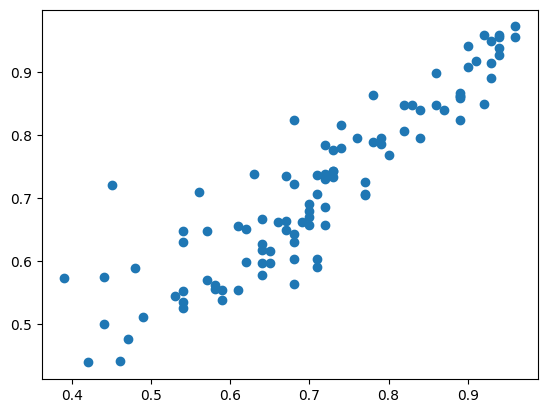

In [137]:
plt.scatter(y_test,y_pred)
plt.show()

The Scatter plot compares the actual admission chances with the Predicted Values

In [138]:
results = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

Build the DataFrame between actual values vs predicated values.Idnetify the difference between them.

In [139]:
print(results.head())

     Actual  Predicted
361    0.93   0.913973
73     0.84   0.795274
374    0.39   0.573192
155    0.77   0.706877
104    0.74   0.815305


The table shows a comparison between actual admission chances and predicted values for sample records.

The predicted values are close to the actual values, indicating that the model is performing reasonably well in estimating admission chances.

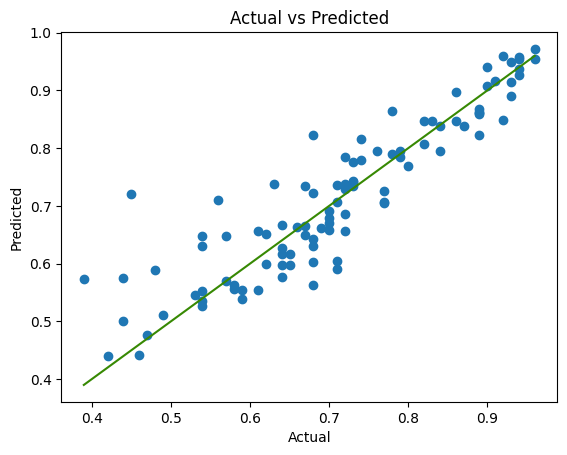

In [140]:
plt.scatter(y_test,y_pred)
line = np.linspace(y_test.min(),y_test.max(),100)

plt.plot(line,line,color="#378903")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Points closer to the line show better prediction accuracy, The performing of the model is very well.

**Assumptions**

In [141]:
residuals = y_test - y_pred

In [142]:
print(residuals)

361    0.016027
73     0.044726
374   -0.183192
155    0.063123
104   -0.075305
         ...   
347   -0.019656
86     0.033676
75    -0.065001
438   -0.064423
15    -0.107971
Name: Chance of Admit , Length: 100, dtype: float64


Errors between actual value and predicated value

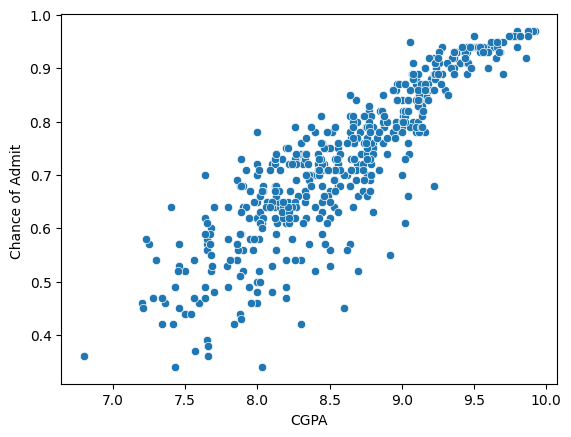

In [143]:
sns.scatterplot(x=df["CGPA"],y = df["Chance of Admit "])
plt.show()

Linearity is satisfied ..maintaing postive correlation

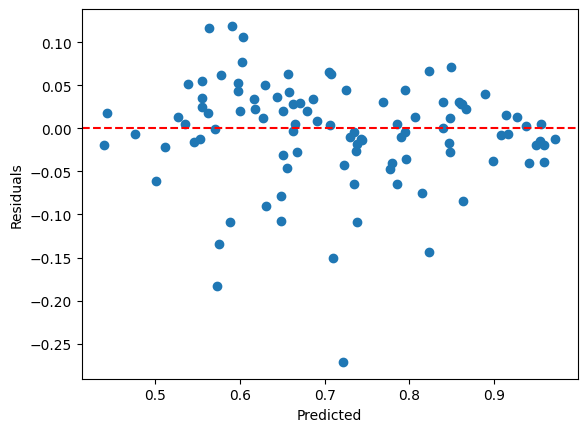

In [144]:
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color="red",linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

residuals spread of errors...homoscadasticity

In [145]:
import scipy.stats as stats

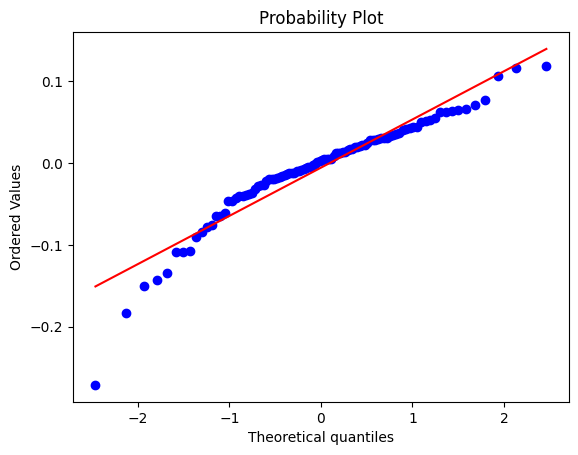

In [146]:
stats.probplot(residuals,dist='norm',plot=plt)
plt.show()

Erorrs are Noramlly Distributed

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [148]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

               Feature         VIF
0            GRE Score         inf
1          TOEFL Score         inf
2    University Rating   21.772114
3                  SOP  188.794448
4                 LOR   181.228914
5                 CGPA  970.675239
6             Research    2.882992
7        Overall_Score         inf
8  SOP_LOR_Interaction  209.368373


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


If the VIF (Variance Inflation Factor) value increases, it indicates multicollinearity, and I reduce it by removing the highly correlated features.


In [149]:
X = X.drop(['Overall_Score','SOP_LOR_Interaction'],axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


Removing the Highly correlated features by using the drop().

In [150]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

             Feature          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4               LOR     30.911476
5               CGPA   950.817985
6           Research     2.869493


After removing the highly correlated features, the VIF values decreased slightly,indicating a reduction in multicollinearity.

In [151]:
X=X.drop(['GRE Score','TOEFL Score'],axis=1)

In [152]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

             Feature        VIF
0  University Rating  19.777410
1                SOP  33.625178
2               LOR   30.356252
3               CGPA  25.101796
4           Research   2.842227


In [153]:
from sklearn.linear_model import Ridge

Importing the Ridge regularization method to reduce Overfitting and improve model performance.

In [154]:
ridge = Ridge(alpha=1.0)
ridge

Ridge()

Initializes a Ridge Regression model with a regularization parameter (alpha) set to 1.0.

The alpha value controls the strength of regularization to reduce overfitting and multicollinearity.

In [155]:
ridge.fit(X,y)

Ridge()

Train the Ridge Regression model on the entire dataset.

In [156]:
y_pred_ridge = ridge.predict(X)

Generate predicted values from the trained Ridge Regression model.

In [157]:
r2_ridge = r2_score(y,y_pred_ridge)

In [158]:
print(ridge.coef_)

[0.00959181 0.00378744 0.01555448 0.15831242 0.03486796]


Displays the coefficients of each independent feature in the Ridge Regression model.

In [159]:
r2_ridge = r2_score(y,y_pred_ridge)


In [160]:
r2_ridge

0.8059584292974895

After applying the regularization the r2 score is 0.80.

**Conclusion**

Linear Regression model was developed on the Jamboree Admission dataset to predict students admission chances.

The initial model achieved an R² score of 82%.

To improve model stability and reduce multicollinearity, Ridge regularization was applied, resulting in an R² score of 80.5%.

Since the difference is minimal, the original model performance of 82% is considered as the final reported result.

The model achieved an R² score of 82%, indicating strong predictive performance in estimating admission chances.